In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
df = pd.read_csv("../Datasets/Trees/Movie_classification.csv", header=0)

In [6]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [9]:
df = pd.get_dummies(df, columns=["3D_available","Genre"],drop_first=True)

In [10]:
X = df.loc[:,df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [11]:
y = df["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [12]:
y.shape

(506,)

In [13]:
X.shape

(506, 20)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 20) (102, 20) (404,) (102,)


## Training Classification Tree

In [17]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [18]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
y_train_pred = clftree.predict(X_train)

In [20]:
y_test_pred = clftree.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]])

In [23]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

In [24]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

## Plotting Decision Tree

In [25]:
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names=X_train.columns,filled=True)

In [26]:
from IPython.display import Image

In [27]:
import pydotplus


In [28]:
graph = pydotplus.graph_from_dot_data(dot_data)

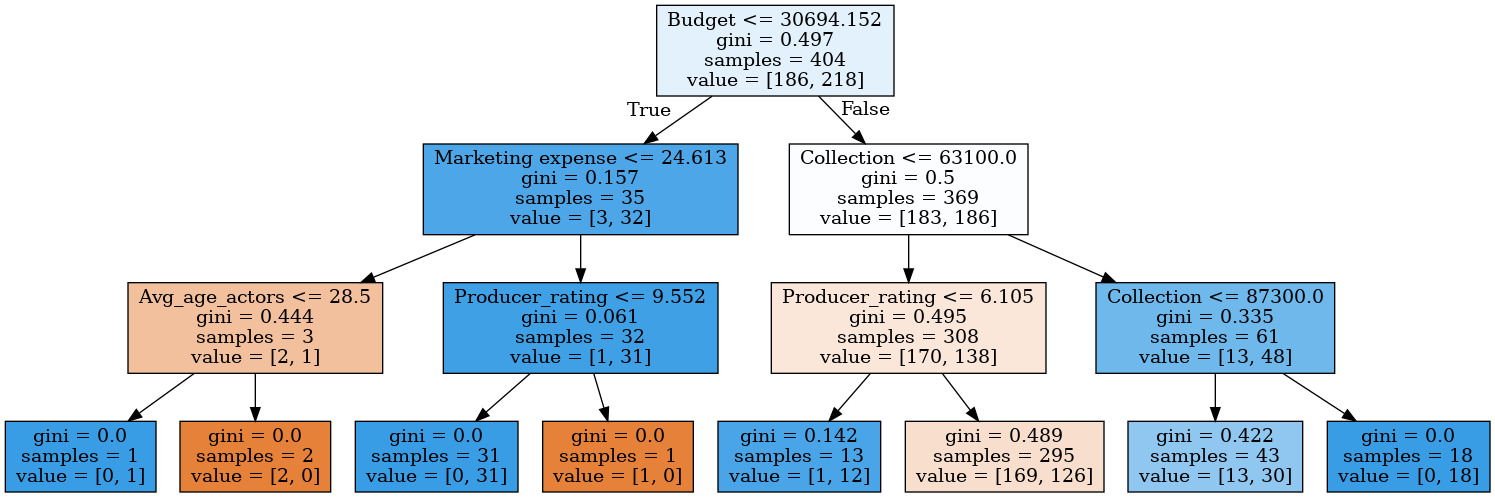

In [29]:
Image(graph.create_png())

## Controlling Tree Growth

In [30]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)

In [31]:
clftree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [32]:
dot_data = tree.export_graphviz(clftree2, out_file=None, feature_names=X_train.columns,filled=True)

In [33]:
graph2 = pydotplus.graph_from_dot_data(dot_data)

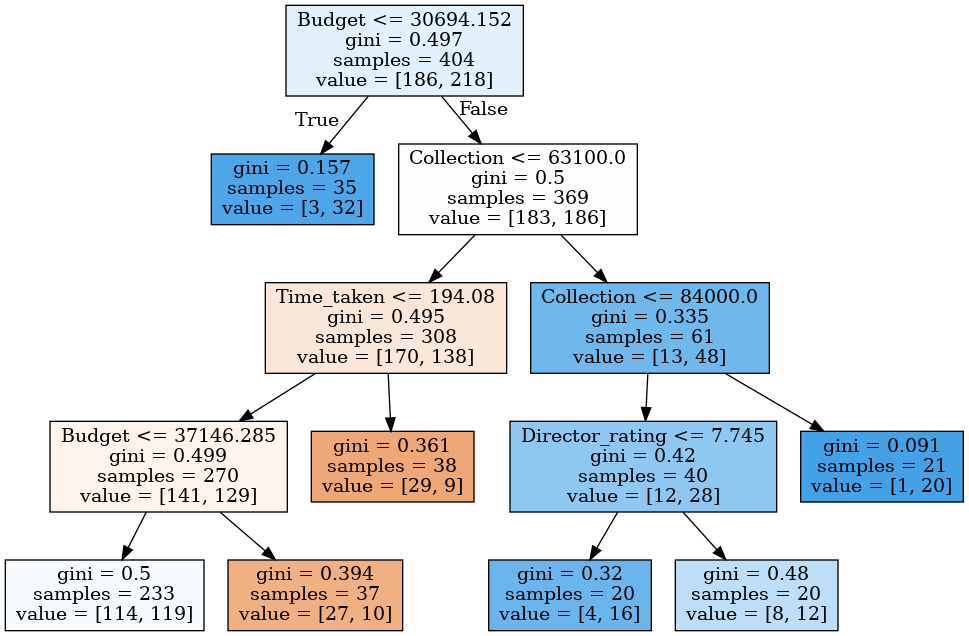

In [34]:
Image(graph2.create_png())

### Bagging

In [35]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
bag_clf = BaggingClassifier(base_estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [38]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [39]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]])

In [40]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6176470588235294

## Random Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=1, random_state=42)

In [43]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=1, random_state=42)

In [44]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]])

In [45]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

## Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42)

In [49]:
param_grid = {"max_features" : [4,5,7,8,9,10],"min_samples_split": [2,3,10]}

In [58]:
grid_search = GridSearchCV(rf_clf,param_grid, n_jobs=-1,cv=5,scoring='accuracy',verbose=1)

In [59]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   13.0s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [60]:
grid_search.best_params_

{'max_features': 10, 'min_samples_split': 2}

In [61]:
cvrf_clf = grid_search.best_estimator_

In [62]:
cvrf_clf

RandomForestClassifier(max_features=10, n_estimators=250, random_state=42)

In [63]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6470588235294118

In [64]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[28, 16],
       [20, 38]])